In [70]:
from datasets import load_dataset
DATASET = "satpalsr/chatml-translation-filter"
dataset = load_dataset(DATASET)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['conversations'],
        num_rows: 1875
    })
    validation: Dataset({
        features: ['conversations'],
        num_rows: 324
    })
})


In [71]:
import pandas as pd
df = pd.DataFrame(dataset['train'])
df

,conversations
0,"[{'from': 'system', 'value': 'For a given ques..."
1,"[{'from': 'system', 'value': 'For a given ques..."
2,"[{'from': 'system', 'value': 'For a given ques..."
3,"[{'from': 'system', 'value': 'For a given ques..."
4,"[{'from': 'system', 'value': 'For a given ques..."
...,...
1870,"[{'from': 'system', 'value': 'For a given ques..."
1871,"[{'from': 'system', 'value': 'For a given ques..."
1872,"[{'from': 'system', 'value': 'For a given ques..."
1873,"[{'from': 'system', 'value': 'For a given ques..."


In [72]:
data_list = df.values.tolist()
data_list

[[[{'from': 'system',
    'value': 'For a given question assess whether translating the potential answer to another language might yield an inaccurate response. Avoid translation in tasks related to coding problems, alliteration, idioms, paraphrasing text, word count, spelling correction, and other linguistic constructs or contextual nuances that may affect the accuracy of the answer. When translation is deemed unsuitable, output {"translate": False}. Otherwise, output {"translate": True}.'},
   {'from': 'human',
    'value': 'Suggest a new design for the following website. Website: http://www.example.com'},
   {'from': 'gpt', 'value': '{"translate": False}'}]],
 [[{'from': 'system',
    'value': 'For a given question assess whether translating the potential answer to another language might yield an inaccurate response. Avoid translation in tasks related to coding problems, alliteration, idioms, paraphrasing text, word count, spelling correction, and other linguistic constructs or cont

In [73]:
print(data_list[0][0][2])

{'from': 'gpt', 'value': '{"translate": False}'}


In [81]:
import ast

# Assuming the string is stored in a variable named `json_string`
json_string = '{"translate": False}xyz'
# converted_dict = ast.literal_eval(json_string)
converted_dict = eval(data_list[0][0][2]['value'])
converted_dict


{'translate': False}

In [41]:
data_list_filtered = list(filter(lambda x: 'False' in x[0][2]['value'], data_list))
len(data_list_filtered)

1049

In [42]:
len(data_list)

1875

In [26]:
324-171

153

In [27]:
sys_template = set()
for i in range(len(data_list)):
    sys_template.add(data_list[i][0][0]['value'])
sys_template

{'For a given question assess whether translating the potential answer to another language might yield an inaccurate response. Avoid translation in tasks related to coding problems, alliteration, idioms, paraphrasing text, word count, spelling correction, and other linguistic constructs or contextual nuances that may affect the accuracy of the answer. When translation is deemed unsuitable, output {"translate": False}. Otherwise, output {"translate": True}.'}

In [28]:
# make a dict of qna
df_dict = {"q": [], "a": []}
for i in range(len(data_list)):
    df_dict["q"].append(data_list[i][0][1]['value'])
    df_dict["a"].append(data_list[i][0][2]['value'])
df_dict

{'q': ['Can you suggest 10 types of plants that are commonly used in traditional medicine?',
  'How would you modify the C++ program to read the text file and count the number of characters in it instead of the number of words?',
  'Create a C++ class named "CreditCard" with private attributes for card number, cardholder\'s name, and credit limit. Include public methods for making purchases, paying bills, and displaying card details. Ensure proper validation checks are in place for purchases and bill payments. Provide a link to the C++ standard library documentation on class templates.',
  'Determine the meaning of the idiom "bite the bullet" and provide an example sentence in which it could be used.',
  'Create a Python program that reads a large text file, splits it into smaller chunks, processes each chunk in parallel using multiple threads, counts the frequency of each word across all chunks, and displays the top 10 most frequent words along with their frequencies.',
  'Create a we

In [29]:
import pandas as pd
df = pd.DataFrame(df_dict)
df

,q,a
0,Can you suggest 10 types of plants that are co...,"{""translate"": True}"
1,How would you modify the C++ program to read t...,"{""translate"": False}"
2,"Create a C++ class named ""CreditCard"" with pri...","{""translate"": False}"
3,"Determine the meaning of the idiom ""bite the b...","{""translate"": False}"
4,Create a Python program that reads a large tex...,"{""translate"": False}"
...,...,...
319,Arrange these words in alphabetical order: gre...,"{""translate"": False}"
320,Create a Python script that interacts with bot...,"{""translate"": False}"
321,Implement a merge sort algorithm in JavaScript...,"{""translate"": False}"
322,Create a Python script that automates the proc...,"{""translate"": False}"


In [61]:
import pickle
with open('result.pkl', 'rb') as f:
    data = pickle.load(f)
data

[RequestOutput(request_id=0, prompt='<|im_start|>system\nFor a given question assess whether translating the potential answer to another language might yield an inaccurate response. Avoid translation in tasks related to coding problems, alliteration, idioms, paraphrasing text, word count, spelling correction, and other linguistic constructs or contextual nuances that may affect the accuracy of the answer. When translation is deemed unsuitable, output {"translate": False}. Otherwise, output {"translate": True}.<|im_end|>\n<|im_start|>user\nCan you suggest 10 types of plants that are commonly used in traditional medicine?<|im_end|>\n<|im_start|>assistant\n', prompt_token_ids=[1, 32000, 1788, 13, 2831, 263, 2183, 1139, 24809, 3692, 5578, 1218, 278, 7037, 1234, 304, 1790, 4086, 1795, 7709, 385, 297, 562, 2764, 403, 2933, 29889, 319, 5405, 13962, 297, 9595, 4475, 304, 14137, 4828, 29892, 599, 1524, 362, 29892, 1178, 29875, 4835, 29892, 610, 481, 1092, 5832, 1426, 29892, 1734, 2302, 29892, 8

In [62]:
data[0]

RequestOutput(request_id=0, prompt='<|im_start|>system\nFor a given question assess whether translating the potential answer to another language might yield an inaccurate response. Avoid translation in tasks related to coding problems, alliteration, idioms, paraphrasing text, word count, spelling correction, and other linguistic constructs or contextual nuances that may affect the accuracy of the answer. When translation is deemed unsuitable, output {"translate": False}. Otherwise, output {"translate": True}.<|im_end|>\n<|im_start|>user\nCan you suggest 10 types of plants that are commonly used in traditional medicine?<|im_end|>\n<|im_start|>assistant\n', prompt_token_ids=[1, 32000, 1788, 13, 2831, 263, 2183, 1139, 24809, 3692, 5578, 1218, 278, 7037, 1234, 304, 1790, 4086, 1795, 7709, 385, 297, 562, 2764, 403, 2933, 29889, 319, 5405, 13962, 297, 9595, 4475, 304, 14137, 4828, 29892, 599, 1524, 362, 29892, 1178, 29875, 4835, 29892, 610, 481, 1092, 5832, 1426, 29892, 1734, 2302, 29892, 80

In [63]:
data[0].__dict__

{'request_id': '0',
 'prompt': '<|im_start|>system\nFor a given question assess whether translating the potential answer to another language might yield an inaccurate response. Avoid translation in tasks related to coding problems, alliteration, idioms, paraphrasing text, word count, spelling correction, and other linguistic constructs or contextual nuances that may affect the accuracy of the answer. When translation is deemed unsuitable, output {"translate": False}. Otherwise, output {"translate": True}.<|im_end|>\n<|im_start|>user\nCan you suggest 10 types of plants that are commonly used in traditional medicine?<|im_end|>\n<|im_start|>assistant\n',
 'prompt_token_ids': [1,
  32000,
  1788,
  13,
  2831,
  263,
  2183,
  1139,
  24809,
  3692,
  5578,
  1218,
  278,
  7037,
  1234,
  304,
  1790,
  4086,
  1795,
  7709,
  385,
  297,
  562,
  2764,
  403,
  2933,
  29889,
  319,
  5405,
  13962,
  297,
  9595,
  4475,
  304,
  14137,
  4828,
  29892,
  599,
  1524,
  362,
  29892,
  

In [64]:
data[0].outputs[0].text

'{"translate": False}'

In [65]:
for i in range(len(data)):
    print(data[i].outputs[0].text)

{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": True}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": True}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": True}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": True}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": True}
{"translate": False}
{"translate": False}
{"translate": True}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False}
{"translate": False

In [66]:
print(len(data))

324


In [67]:
from evaluate import get_df_dict
DATASET = "satpalsr/chatml-translation-filter"
df_dict = get_df_dict(DATASET)
df_dict_q = df_dict["q"]
df_dict_a = df_dict["a"]
df_dict_a

['{"translate": True}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": False}',
 '{"translate": False}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": True}',
 '{"translate": True}

In [68]:
for i in range(len(data)):
    print(data[i].prompt.split("user")[1].split("<|im_end|>")[0])
    print(df_dict_q[i])
    print("predicted",data[i].outputs[0].text)
    print("actual   ",df_dict_a[i])
    print()
    
    


Can you suggest 10 types of plants that are commonly used in traditional medicine?
Can you suggest 10 types of plants that are commonly used in traditional medicine?
predicted {"translate": False}
actual    {"translate": True}


How would you modify the C++ program to read the text file and count the number of characters in it instead of the number of words?
How would you modify the C++ program to read the text file and count the number of characters in it instead of the number of words?
predicted {"translate": False}
actual    {"translate": False}


Create a C++ class named "CreditCard" with private attributes for card number, cardholder's name, and credit limit. Include public methods for making purchases, paying bills, and displaying card details. Ensure proper validation checks are in place for purchases and bill payments. Provide a link to the C++ standard library documentation on class templates.
Create a C++ class named "CreditCard" with private attributes for card number, card

In [69]:
count_True = 0
count_False = 0
count_None = 0
count_correct = 0

for i in range(len(data)):
    if 'True' in data[i].outputs[0].text:
        count_True += 1
        if 'True' in df_dict_a[i]:
            count_correct += 1
    if 'False' in data[i].outputs[0].text:
        count_False += 1
        if 'False' in df_dict_a[i]:
            count_correct += 1
    if 'True' not in data[i].outputs[0].text and 'False' not in data[i].outputs[0].text:
        count_None += 1

print(count_True)
print(count_False)
print(count_None)
print(count_correct)


66
258
1
192


In [9]:
from evaluate import get_df_dict
DATASET = "satpalsr/chatml-translation-filter"
df_dict = get_df_dict(DATASET)

In [10]:
with open('result.pkl', 'rb') as f:
    result_data = pickle.load(f)

data = []
for i in range(len(result_data)):
    result = result_data[i]
    for j in range(len(df_dict["q"])):
        text = result[j].outputs[0].text.strip()
        try:
            output_dict = eval(text)
            if i == 0:
                data.append({"question": df_dict["q"][j], "answer": df_dict["a"][j], "output": {f"{i*10}%": {"value":output_dict["translate"], "status": "valid"}}})
            else:
                data[j]["output"].update({f"{i*10}%": {"value":output_dict["translate"], "status": "valid"}})
        except:
            if i == 0:
                data.append({"question": df_dict["q"][j], "answer": df_dict["a"][j], "output": {f"{i*10}%": {"value":text, "status": "invalid"}}})
            else:
                data[j]["output"].update({f"{i*10}%": {"value":text, "status": "invalid"}})
            continue

with open("data2.pkl", "wb") as f:
    pickle.dump(data, f)


In [11]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Results for temperature 0%
Total: 324
Total Predicted Translate: 12
Total Predited Don't Translate: 312
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 9
Incorrect Translate: 3
Correct Don't Translate: 168
Incorrect Don't Translate: 144
Total Correct: 177
Total Incorrect: 147
No Output: 0
Achieved Accuracy: 0.5462962962962963
Achieved Sensitivity: 0.058823529411764705
Achieved Specificity: 0.9795918367346939


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12], "Total Predicted Don't Translate": [312], 'Total Actual Translate': [153], "Total Actual Don't Translate": [171], 'Correct Translate': [9], 'Incorrect Translate': [3], "Correct Don't Translate": [168], "Incorrect Don't Translate": [144], 'Total Correct': [177], 'Total Incorrect': [147], 'No Output': [0], 'Achieved Accuracy': [0.5462962962962963], 'Achieved Sensitivity': [0.058823529411764705], 'Achieved Specificity': [0.9795918367346939]}


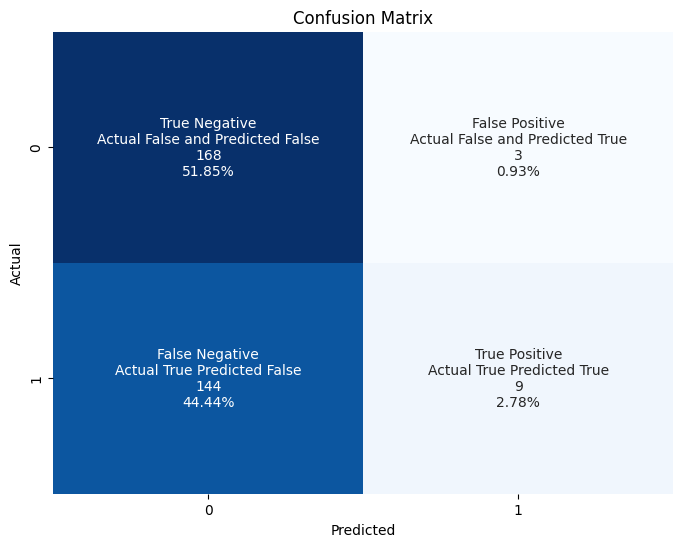

Results for temperature 10%
Total: 324
Total Predicted Translate: 10
Total Predited Don't Translate: 314
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 8
Incorrect Translate: 2
Correct Don't Translate: 169
Incorrect Don't Translate: 145
Total Correct: 177
Total Incorrect: 147
No Output: 0
Achieved Accuracy: 0.5462962962962963
Achieved Sensitivity: 0.05228758169934641
Achieved Specificity: 0.9863945578231292


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10], "Total Predicted Don't Translate": [312, 314], 'Total Actual Translate': [153, 153], "Total Actual Don't Translate": [171, 171], 'Correct Translate': [9, 8], 'Incorrect Translate': [3, 2], "Correct Don't Translate": [168, 169], "Incorrect Don't Translate": [144, 145], 'Total Correct': [177, 177], 'Total Incorrect': [147, 147], 'No Output': [0, 0], 'Achieved Accuracy': [0.5462962962962963, 0.5462962962962963], 'Achieved Sensitivity': [0.0588235

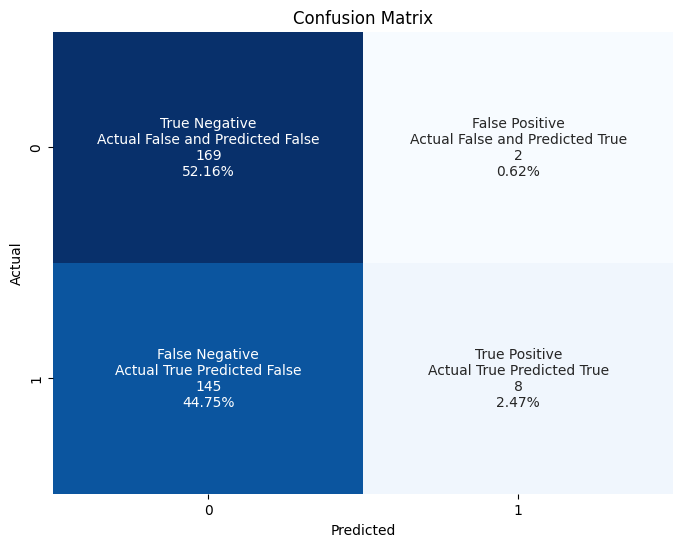

Results for temperature 20%
Total: 324
Total Predicted Translate: 26
Total Predited Don't Translate: 298
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 21
Incorrect Translate: 5
Correct Don't Translate: 166
Incorrect Don't Translate: 132
Total Correct: 187
Total Incorrect: 137
No Output: 0
Achieved Accuracy: 0.5771604938271605
Achieved Sensitivity: 0.13725490196078433
Achieved Specificity: 0.9635036496350365


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26], "Total Predicted Don't Translate": [312, 314, 298], 'Total Actual Translate': [153, 153, 153], "Total Actual Don't Translate": [171, 171, 171], 'Correct Translate': [9, 8, 21], 'Incorrect Translate': [3, 2, 5], "Correct Don't Translate": [168, 169, 166], "Incorrect Don't Translate": [144, 145, 132], 'Total Correct': [177, 177, 187], 'Total Incorrect': [147, 147, 137], 'No Output': [0, 0, 0], 'Achieved Accuracy': [0.5462962962962963, 0.546

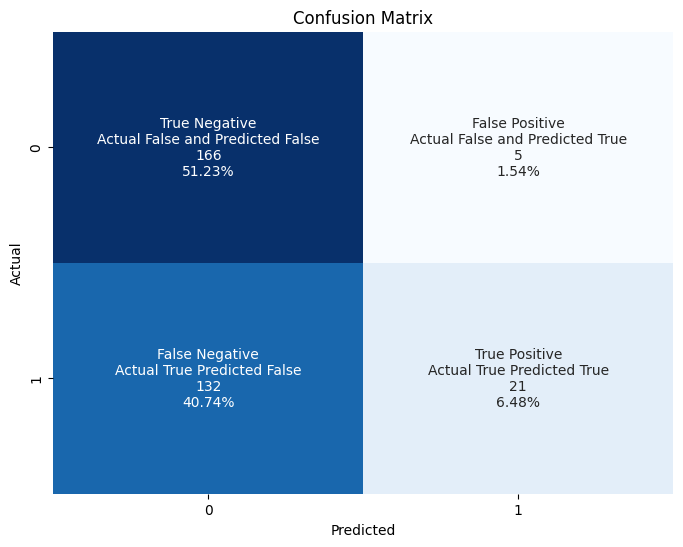

Results for temperature 30%
Total: 324
Total Predicted Translate: 36
Total Predited Don't Translate: 288
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 28
Incorrect Translate: 8
Correct Don't Translate: 163
Incorrect Don't Translate: 125
Total Correct: 191
Total Incorrect: 133
No Output: 0
Achieved Accuracy: 0.5895061728395061
Achieved Sensitivity: 0.1830065359477124
Achieved Specificity: 0.9398496240601504


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36], "Total Predicted Don't Translate": [312, 314, 298, 288], 'Total Actual Translate': [153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28], 'Incorrect Translate': [3, 2, 5, 8], "Correct Don't Translate": [168, 169, 166, 163], "Incorrect Don't Translate": [144, 145, 132, 125], 'Total Correct': [177, 177, 187, 191], 'Total Incorrect': [147, 147, 137, 133], 'No Output': [0, 0, 0, 0],

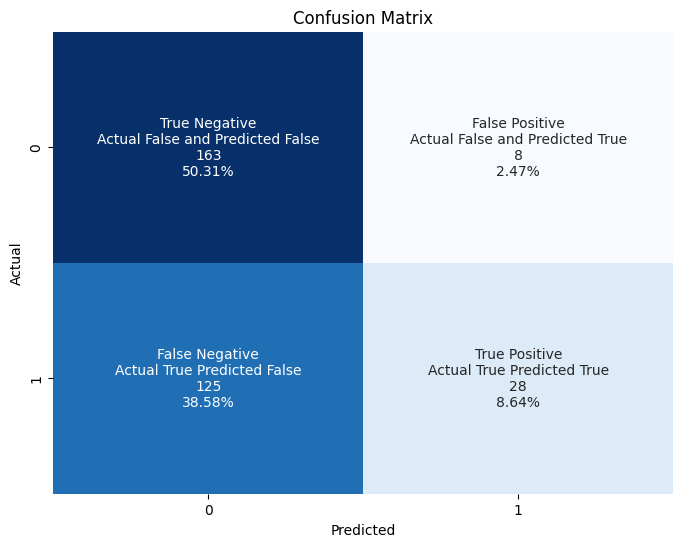

Results for temperature 40%
Total: 324
Total Predicted Translate: 41
Total Predited Don't Translate: 283
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 31
Incorrect Translate: 10
Correct Don't Translate: 161
Incorrect Don't Translate: 122
Total Correct: 192
Total Incorrect: 132
No Output: 0
Achieved Accuracy: 0.5925925925925926
Achieved Sensitivity: 0.20261437908496732
Achieved Specificity: 0.9242424242424242


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41], "Total Predicted Don't Translate": [312, 314, 298, 288, 283], 'Total Actual Translate': [153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31], 'Incorrect Translate': [3, 2, 5, 8, 10], "Correct Don't Translate": [168, 169, 166, 163, 161], "Incorrect Don't Translate": [144, 145, 132, 125, 122], 'Total Correct': [177, 177, 187, 191, 192], 'Total Incorrect': [147

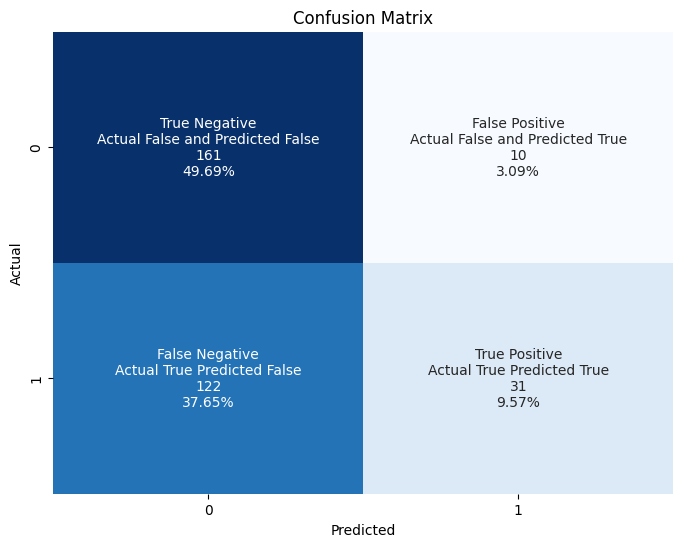

Results for temperature 50%
Total: 324
Total Predicted Translate: 58
Total Predited Don't Translate: 265
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 43
Incorrect Translate: 15
Correct Don't Translate: 155
Incorrect Don't Translate: 110
Total Correct: 198
Total Incorrect: 125
No Output: 1
Achieved Accuracy: 0.6130030959752322
Achieved Sensitivity: 0.28104575163398693
Achieved Specificity: 0.88


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41, 58], "Total Predicted Don't Translate": [312, 314, 298, 288, 283, 265], 'Total Actual Translate': [153, 153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31, 43], 'Incorrect Translate': [3, 2, 5, 8, 10, 15], "Correct Don't Translate": [168, 169, 166, 163, 161, 155], "Incorrect Don't Translate": [144, 145, 132, 125, 122, 110], 'Total Correct': [177, 177, 187, 191, 192, 1

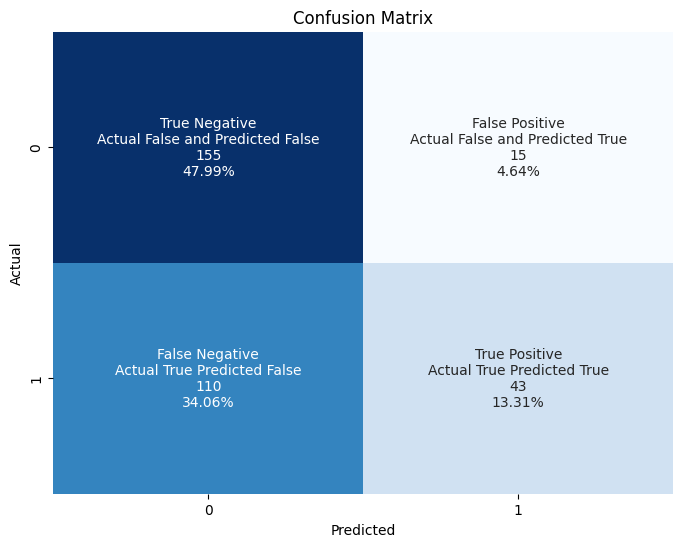

Results for temperature 60%
Total: 324
Total Predicted Translate: 76
Total Predited Don't Translate: 247
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 54
Incorrect Translate: 22
Correct Don't Translate: 148
Incorrect Don't Translate: 99
Total Correct: 202
Total Incorrect: 121
No Output: 1
Achieved Accuracy: 0.6253869969040248
Achieved Sensitivity: 0.35294117647058826
Achieved Specificity: 0.8181818181818182


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41, 58, 76], "Total Predicted Don't Translate": [312, 314, 298, 288, 283, 265, 247], 'Total Actual Translate': [153, 153, 153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31, 43, 54], 'Incorrect Translate': [3, 2, 5, 8, 10, 15, 22], "Correct Don't Translate": [168, 169, 166, 163, 161, 155, 148], "Incorrect Don't Translate": [144, 145, 132, 125, 122, 110, 

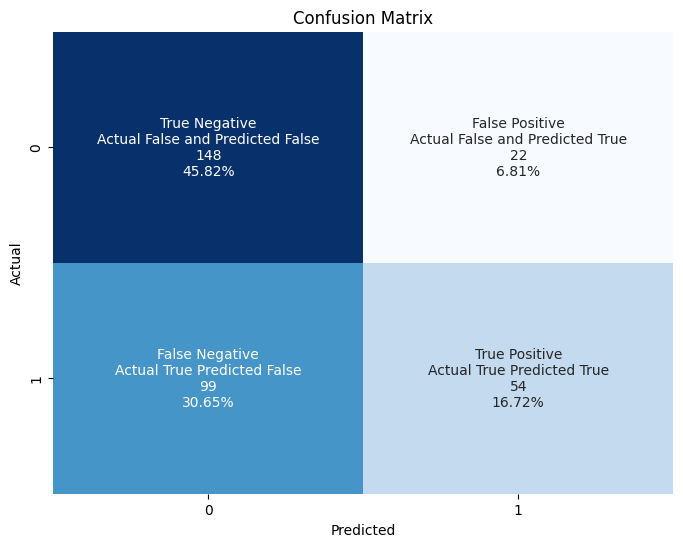

Results for temperature 70%
Total: 324
Total Predicted Translate: 76
Total Predited Don't Translate: 248
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 53
Incorrect Translate: 23
Correct Don't Translate: 148
Incorrect Don't Translate: 100
Total Correct: 201
Total Incorrect: 123
No Output: 0
Achieved Accuracy: 0.6203703703703703
Achieved Sensitivity: 0.3464052287581699
Achieved Specificity: 0.8130081300813008


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41, 58, 76, 76], "Total Predicted Don't Translate": [312, 314, 298, 288, 283, 265, 247, 248], 'Total Actual Translate': [153, 153, 153, 153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31, 43, 54, 53], 'Incorrect Translate': [3, 2, 5, 8, 10, 15, 22, 23], "Correct Don't Translate": [168, 169, 166, 163, 161, 155, 148, 148], "Incorrect Don't Translate":

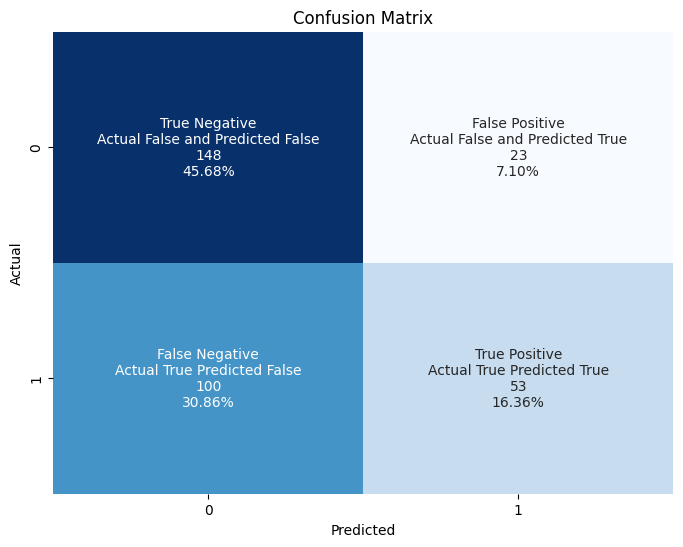

Results for temperature 80%
Total: 324
Total Predicted Translate: 83
Total Predited Don't Translate: 238
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 52
Incorrect Translate: 31
Correct Don't Translate: 137
Incorrect Don't Translate: 101
Total Correct: 189
Total Incorrect: 132
No Output: 3
Achieved Accuracy: 0.5887850467289719
Achieved Sensitivity: 0.33986928104575165
Achieved Specificity: 0.7651515151515151


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41, 58, 76, 76, 83], "Total Predicted Don't Translate": [312, 314, 298, 288, 283, 265, 247, 248, 238], 'Total Actual Translate': [153, 153, 153, 153, 153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31, 43, 54, 53, 52], 'Incorrect Translate': [3, 2, 5, 8, 10, 15, 22, 23, 31], "Correct Don't Translate": [168, 169, 166, 163, 161, 155, 148, 148, 1

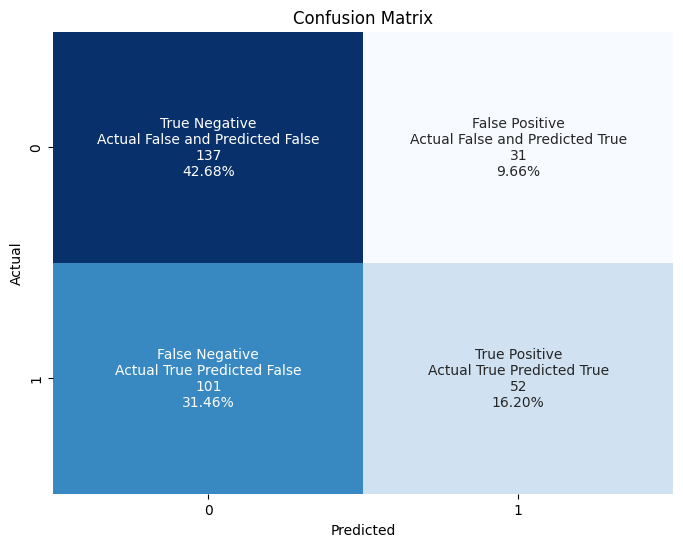

Results for temperature 90%
Total: 324
Total Predicted Translate: 78
Total Predited Don't Translate: 239
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 46
Incorrect Translate: 32
Correct Don't Translate: 134
Incorrect Don't Translate: 105
Total Correct: 180
Total Incorrect: 137
No Output: 7
Achieved Accuracy: 0.5678233438485805
Achieved Sensitivity: 0.304635761589404
Achieved Specificity: 0.7664233576642335


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41, 58, 76, 76, 83, 78], "Total Predicted Don't Translate": [312, 314, 298, 288, 283, 265, 247, 248, 238, 239], 'Total Actual Translate': [153, 153, 153, 153, 153, 153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171, 171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31, 43, 54, 53, 52, 46], 'Incorrect Translate': [3, 2, 5, 8, 10, 15, 22, 23, 31, 32], "Correct Don't Translate": [168, 169, 166, 1

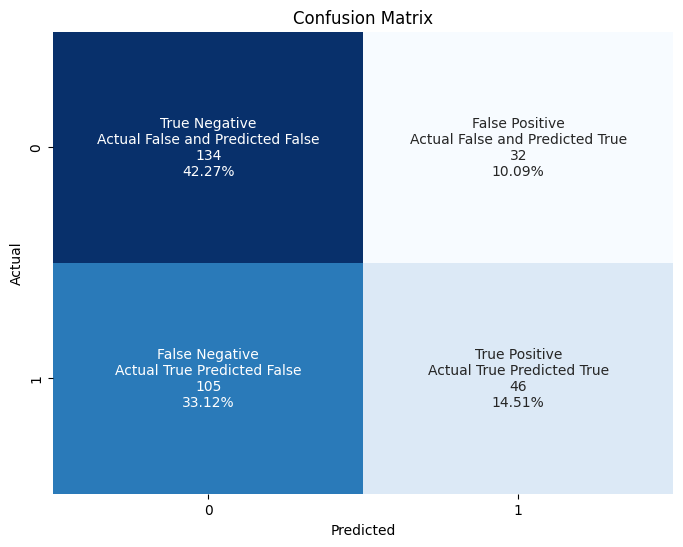

Results for temperature 100%
Total: 324
Total Predicted Translate: 89
Total Predited Don't Translate: 218
Total Actual Translate: 153
Total Actual Don't Translate: 171
Correct Translate: 60
Incorrect Translate: 29
Correct Don't Translate: 135
Incorrect Don't Translate: 83
Total Correct: 195
Total Incorrect: 112
No Output: 17
Achieved Accuracy: 0.6351791530944625
Achieved Sensitivity: 0.4195804195804196
Achieved Specificity: 0.7410714285714286


{'Total': [324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324], 'Total Predicted Translate': [12, 10, 26, 36, 41, 58, 76, 76, 83, 78, 89], "Total Predicted Don't Translate": [312, 314, 298, 288, 283, 265, 247, 248, 238, 239, 218], 'Total Actual Translate': [153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153], "Total Actual Don't Translate": [171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171], 'Correct Translate': [9, 8, 21, 28, 31, 43, 54, 53, 52, 46, 60], 'Incorrect Translate': [3, 2, 5, 8, 10, 15, 22, 23, 31, 32, 29], "Correct Don't 

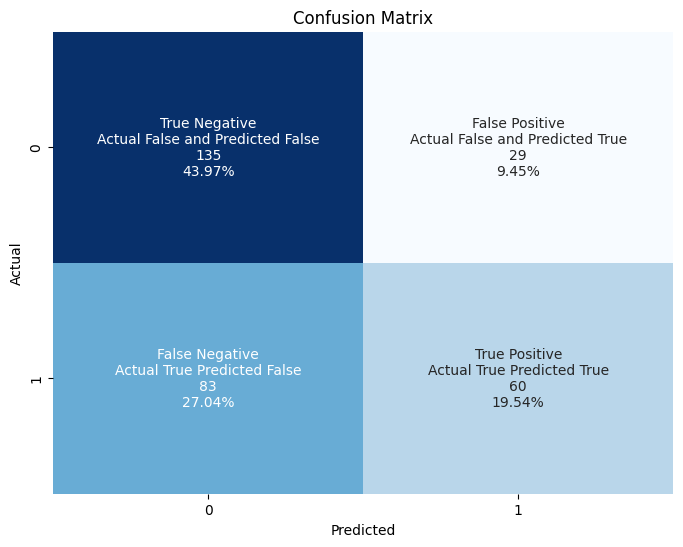

,Total,Total Predicted Translate,Total Predicted Don't Translate,Total Actual Translate,Total Actual Don't Translate,Correct Translate,Incorrect Translate,Correct Don't Translate,Incorrect Don't Translate,Total Correct,Total Incorrect,No Output,Achieved Accuracy,Achieved Sensitivity,Achieved Specificity
0,324,12,312,153,171,9,3,168,144,177,147,0,0.546296,0.058824,0.979592
1,324,10,314,153,171,8,2,169,145,177,147,0,0.546296,0.052288,0.986395
2,324,26,298,153,171,21,5,166,132,187,137,0,0.577160,0.137255,0.963504
3,324,36,288,153,171,28,8,163,125,191,133,0,0.589506,0.183007,0.939850
4,324,41,283,153,171,31,10,161,122,192,132,0,0.592593,0.202614,0.924242
5,324,58,265,153,171,43,15,155,110,198,125,1,0.613003,0.281046,0.880000
6,324,76,247,153,171,54,22,148,99,202,121,1,0.625387,0.352941,0.818182
7,324,76,248,153,171,53,23,148,100,201,123,0,0.620370,0.346405,0.813008
8,324,83,238,153,171,52,31,137,101,189,132,3,0.588785,0.339869,0.765152
9,324,78,239,153,171,46,32,134,105,180,137,7,0.567823,0.304636,0.766423


In [18]:
import pickle
with open('data2.pkl', 'rb') as f:
    data = pickle.load(f)
dct = {
    'Total': [len(df_dict['q']) for i in range(11)],
    'Total Predicted Translate': [],
    'Total Predicted Don\'t Translate': [],
    'Total Actual Translate': [],
    'Total Actual Don\'t Translate': [],
    'Correct Translate': [],
    'Incorrect Translate': [],
    'Correct Don\'t Translate': [],
    'Incorrect Don\'t Translate': [],
    'Total Correct': [],
    'Total Incorrect': [],
    'No Output': [],
    'Achieved Accuracy': [],
    'Achieved Sensitivity': [],
    'Achieved Specificity': []
}
if True:

    for i in range(11):
        print(f"Results for temperature {i*10}%")
        count_actual_true = 0
        count_actual_false = 0
        count_predicted_true = 0
        count_predicted_false = 0
        count_correct_true = 0
        count_incorrect_true = 0
        count_correct_false = 0
        count_incorrect_false = 0
        count_no_output = 0
        for j in range(len(df_dict["q"])):
            if df_dict["a"][j]['translate']:
                count_actual_true += 1
            else:
                count_actual_false += 1

            if data[j]["output"][f"{i*10}%"]["status"] == "valid":
                if data[j]["output"][f"{i*10}%"]["value"]:
                    if data[j]["output"][f"{i*10}%"]["value"] == df_dict["a"][j]['translate']:
                        count_correct_true += 1
                    else:
                        count_incorrect_true += 1
                else:
                    if data[j]["output"][f"{i*10}%"]["value"] == df_dict["a"][j]['translate']:
                        count_correct_false += 1
                    else:
                        count_incorrect_false += 1
            else:
                count_no_output += 1

        count_predicted_false = count_correct_false+ count_incorrect_false
        count_predicted_true = count_correct_true + count_incorrect_true
        dct['Total Predicted Translate'].append(count_predicted_true)
        dct['Total Predicted Don\'t Translate'].append(count_predicted_false)
        dct['Total Actual Translate'].append(count_actual_true)
        dct['Total Actual Don\'t Translate'].append(count_actual_false)
        dct['Correct Translate'].append(count_correct_true)
        dct['Incorrect Translate'].append(count_incorrect_true)
        dct['Correct Don\'t Translate'].append(count_correct_false)
        dct['Incorrect Don\'t Translate'].append(count_incorrect_false)
        dct['Total Correct'].append(count_correct_true+count_correct_false)
        dct['Total Incorrect'].append(count_incorrect_true+count_incorrect_false)
        dct['No Output'].append(count_no_output)
        dct['Achieved Accuracy'].append((count_correct_true+count_correct_false)/(len(df_dict['q'])-count_no_output))
        dct['Achieved Sensitivity'].append(count_correct_true/(count_correct_true + count_incorrect_false))
        dct['Achieved Specificity'].append(count_incorrect_false/(count_incorrect_false+count_incorrect_true))
        total = count_correct_true + count_incorrect_true + count_correct_false + count_incorrect_false

        cf_matrix = np.array([
            [count_correct_false, count_incorrect_true],
            [count_incorrect_false, count_correct_true]
        ])

        # Names for the matrix quadrants
        group_names = ["True Negative\nActual False and Predicted False", "False Positive\nActual False and Predicted True",
                    "False Negative\nActual True Predicted False", "True Positive\nActual True Predicted True"]

        # Counts in each quadrant
        group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]

        # Percentages for each quadrant
        group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / total]

        # Create labels by combining the names, counts, and percentages
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
        labels = np.array(labels).reshape(2, 2)

        # Create the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
df = pd.DataFrame(dct)

In [19]:
df.to_csv("results.csv")